In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import ensemble
from sklearn.linear_model import Lasso,Ridge
#load train data
df_data=pd.read_csv("data_price.csv")
df_data.head()
#to know each and every column execute the following
print(df_data.columns)
print(df_data.shape)
total = df_data.isnull().sum().sort_values(ascending=False)
percent = (df_data.isnull().sum()/df_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=[‘Total’, ‘Percent’])
missing_data.head(20)
df_data= df_data.drop(missing_data[missing_data[‘Total’]>1].index.values,1)
df_data= df_data.drop(df_data.loc[df_data[‘Electrical’].isnull()].index)
corr_mat=df_data.corr()
fi,ax=plt.subplots(figsize=(20,20))
sns.heatmap(corr_mat,square=True)
del df_data[‘Id’]
le=LabelEncoder()
cat_mask= df_data.dtypes==’object’
cat_cols= df_data.columns[cat_mask].tolist()
cat_cols
#Lets convert the columns to one ht encoding
df_data[cat_cols]=df_data[cat_cols].apply(lambda x: le.fit_transform(x.astype(str)))
df_data_c = df_data.copy()
#get_dummies is used for one hot encoding
df_data_c = pd.get_dummies(df_data_c,columns=cat_cols)
x_train, x_test, y_train, y_test = train_test_split(df_data_c.drop(‘SalePrice’,axis=1),df_data_c[‘SalePrice’], test_size =0.25,random_state=120)
y_train= y_train.values.reshape(-1,1)
y_test= y_test.values.reshape(-1,1)
sc_X = StandardScaler()
sc_y = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.fit_transform(x_test)
y_train = sc_X.fit_transform(y_train)
y_test = sc_y.fit_transform(y_test)
#Linear Regression
lm = LinearRegression()
lm.fit(x_train,y_train)
#predictions on train data
x_pred = lm.predict(x_train)
x_pred = x_pred.reshape(-1,1)
#Prediction of test data
y_pred = lm.predict(x_test)
y_pred= y_pred.reshape(-1,1)
def scores_(y,x):
    print('MAE:', metrics.mean_absolute_error(y, x))
    print('MSE:', metrics.mean_squared_error(y, x))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y, x)))
    print('R2 Score:' ,metrics.r2_score(y,x))
print('InSample_accuracy')
scores_(y_train, x_pred)
print('---------------------------')
print('OutSample_accuracy')
scores_(y_test,y_pred)
def regularization_model(model,alpha_range):
    rmse_score_insample=[]
    rmse_score_outsample=[]
    r2_score_insample=[]
    r2_score_outsample=[]
    for i in alpha_range:
       regularization = model(alpha=i,normalize=True)
       regularization.fit(x_train,y_train)
       y_pred_train = regularization.predict(x_train)
       y_pred_train = y_pred_train.reshape(-1,1)
       y_pred_test=regularization.predict(x_test)
       y_pred_test = y_pred_test.reshape(-1,1)
       rmse_score_insample.append(np.sqrt(metrics.mean_squared_error(y_train,y_pred_train )))
       rmse_score_outsample.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
       r2_score_insample.append(metrics.r2_score(y_train, y_pred_train))
       r2_score_outsample.append(metrics.r2_score(y_test, y_pred_test))
df=pd.DataFrame()
    df[‘alpha’]=alpha_range
    df[‘rmse_score_insample’] = rmse_score_insample
    df[‘rmse_score_outsample’]= rmse_score_outsample 
    df[‘r2_score_insample’] = r2_score_insample
    df[‘r2_score_outsample’] = r2_score_outsample
    return df.plot(x = ‘alpha’, y = [‘rmse_score_insample’,’rmse_score_outsample’])
alpha_range_lasso = np.arange(0.001,0.03,0.001)
print(regularization_model(Lasso,alpha_range_lasso))
alpha_range_ridge = np.arange(0.001,1,0.1)
print(regularization_model(Ridge,alpha_range))


SyntaxError: invalid character in identifier (<ipython-input-7-9f5064809dd1>, line 19)

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


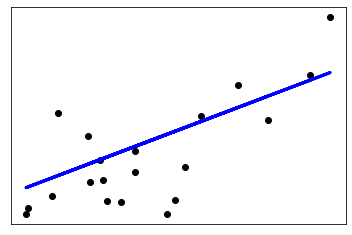

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [6]:
x, y = np.ogrid[:3, :4]
print(x)
print(y)

[[0]
 [1]
 [2]]
[[0 1 2 3]]


In [110]:
people = ['Dr. Christopher Brooks', 'Dr. Kevyn Collins-Thompson', 'Dr. VG Vinod Vydiswaran', 'Dr. Daniel Romero']
def split_title_and_name(person):
    return person.split()[0] + person.split()[-1]

list(map(split_title_and_name, people))

['Dr.Brooks', 'Dr.Collins-Thompson', 'Dr.Vydiswaran', 'Dr.Romero']

In [85]:
# 2-D List
matrix = [[1, 2, 3], [4, 5], [6, 7, 8, 9]]
  
# Nested List Comprehension to flatten a given 2-D matrix
flatten_matrix = [val for sublist in matrix for val in sublist]
  
print(flatten_matrix)

[1, 2, 3, 4, 5, 6, 7, 8, 9]


In [116]:
lowercase = 'abcdefghijklmnopqrstuvwxyz'
digits = '0123456789'

answer = [i+i+j+j for i in digits for j in lowercase]
c = [a+b+c+d for a in lowercase for b in lowercase for c in digits for d in digits]
c

['aa00',
 'aa01',
 'aa02',
 'aa03',
 'aa04',
 'aa05',
 'aa06',
 'aa07',
 'aa08',
 'aa09',
 'aa10',
 'aa11',
 'aa12',
 'aa13',
 'aa14',
 'aa15',
 'aa16',
 'aa17',
 'aa18',
 'aa19',
 'aa20',
 'aa21',
 'aa22',
 'aa23',
 'aa24',
 'aa25',
 'aa26',
 'aa27',
 'aa28',
 'aa29',
 'aa30',
 'aa31',
 'aa32',
 'aa33',
 'aa34',
 'aa35',
 'aa36',
 'aa37',
 'aa38',
 'aa39',
 'aa40',
 'aa41',
 'aa42',
 'aa43',
 'aa44',
 'aa45',
 'aa46',
 'aa47',
 'aa48',
 'aa49',
 'aa50',
 'aa51',
 'aa52',
 'aa53',
 'aa54',
 'aa55',
 'aa56',
 'aa57',
 'aa58',
 'aa59',
 'aa60',
 'aa61',
 'aa62',
 'aa63',
 'aa64',
 'aa65',
 'aa66',
 'aa67',
 'aa68',
 'aa69',
 'aa70',
 'aa71',
 'aa72',
 'aa73',
 'aa74',
 'aa75',
 'aa76',
 'aa77',
 'aa78',
 'aa79',
 'aa80',
 'aa81',
 'aa82',
 'aa83',
 'aa84',
 'aa85',
 'aa86',
 'aa87',
 'aa88',
 'aa89',
 'aa90',
 'aa91',
 'aa92',
 'aa93',
 'aa94',
 'aa95',
 'aa96',
 'aa97',
 'aa98',
 'aa99',
 'ab00',
 'ab01',
 'ab02',
 'ab03',
 'ab04',
 'ab05',
 'ab06',
 'ab07',
 'ab08',
 'ab09',
 'ab10',
 